In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df1 = pd.read_csv('Downloads/archive (2)/application_record.csv')

In [12]:
df2 = pd.read_csv('Downloads/archive (2)/credit_record.csv')

# Data Cleaning

In [14]:
len(df1['ID'].unique())

438510

In [15]:
len(df2['ID'].unique())

45985

In [16]:
df2['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [17]:
len(set(df2['ID']).intersection(set(df1['ID']))) # how many people with credit history?

36457

Convert days_birth and days_employed into age and years employed

In [19]:
# If DAYS_EMPLOYED is positive, set it to 0
df1['DAYS_EMPLOYED'] = np.where(df1['DAYS_EMPLOYED'] > 0, 0, df1['DAYS_EMPLOYED'])

# Function to convert days to years
def days_to_years(days):
    return (-days / 365).round(0).astype(int)  # Ensure proper integer conversion

# Apply function to both columns
df1['age'] = days_to_years(df1['DAYS_BIRTH'])
df1['years_employed'] = days_to_years(df1['DAYS_EMPLOYED'])

# Verify that transformation worked
print(df1[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'age', 'years_employed']].head())

   DAYS_BIRTH  DAYS_EMPLOYED  age  years_employed
0      -12005          -4542   33              12
1      -12005          -4542   33              12
2      -21474          -1134   59               3
3      -19110          -3051   52               8
4      -19110          -3051   52               8


In [20]:
df = pd.merge(df1, df2, on='ID', how='inner') # merge 2 data sets

In [21]:
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
age                         0
years_employed              0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [22]:
df.columns = df.columns.str.lower()

In [23]:
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,age,years_employed,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,33,12,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,33,12,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,33,12,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,33,12,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,33,12,-4,C


In [24]:
# drop columns not using anymore
df.drop(['days_birth', 'days_employed'], axis=1, inplace=True)

In [25]:
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,age,years_employed,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,33,12,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,33,12,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,33,12,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,33,12,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,33,12,-4,C


In [26]:
df.rename(columns={'code_gender': 'gender',
                   'flag_own_car': 'car_owned',
                   'flag_own_realty': 'realty_owned',
                   'cnt_children': 'children',
                   'amt_income_total': 'income',
                   'name_income_type': 'employment_type',
                   'name_education_type': 'education',
                   'name_family_status': 'marital_status',
                   'name_housing_type': 'housing',
                   'days_registration': 'days_registered',
                   'flag_mobil': 'phone_owned',
                   'flag_work_phone': 'work_phone_owned',
                   'flag_phone': 'mobile_phone_owned',
                   'flag_email': 'email_owned',
                   'occupation_type': 'occupation',
                   'cnt_fam_members': 'family_size',
                   'status': 'credit_status'}, inplace=True)

In [27]:
df.columns

Index(['id', 'gender', 'car_owned', 'realty_owned', 'children', 'income',
       'employment_type', 'education', 'marital_status', 'housing',
       'phone_owned', 'work_phone_owned', 'mobile_phone_owned', 'email_owned',
       'occupation', 'family_size', 'age', 'years_employed', 'months_balance',
       'credit_status'],
      dtype='object')

In [28]:
df['status_excellent'] = df['credit_status'].map(lambda x: 1 if x in ['X', 'C'] else 0)

In [29]:
df['status_good'] = df['credit_status'].map(lambda x: 1 if x in ['X', 'C', '0'] else 0)

In [30]:
df['status_bad'] = df['credit_status'].map(lambda x: 1 if x in [ '3','4', '5'] else 0)

In [31]:
df.head()

,id,gender,car_owned,realty_owned,children,income,employment_type,education,marital_status,housing,...,email_owned,occupation,family_size,age,years_employed,months_balance,credit_status,status_excellent,status_good,status_bad
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,33,12,0,C,1,1,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,33,12,-1,C,1,1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,33,12,-2,C,1,1,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,33,12,-3,C,1,1,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,33,12,-4,C,1,1,0


In [32]:
# Convert status columns to integer type
df['status_excellent'] = df['status_excellent'].astype(int)
df['status_good'] = df['status_good'].astype(int)
df['status_bad'] = df['status_bad'].astype(int)

# Count total number of records per applicant (only needs to be done once)
total_records = df.groupby('id').size().reset_index(name='total_records')

# Count how many times STATUS is 1 (on-time payments) per applicant
ot_excellent = df.groupby('id')['status_excellent'].sum().reset_index(name='total_on_payments_ex')
ot_good = df.groupby('id')['status_good'].sum().reset_index(name='total_on_payments_good')
ot_bad = df.groupby('id')['status_bad'].sum().reset_index(name='total_on_payments_bad')

# Merge all counts into one dataframe
payment_stats = total_records.merge(ot_excellent, on='id').merge(ot_good, on='id').merge(ot_bad, on='id')

# Calculate on-time payment rate correctly
payment_stats['excellent_payback'] = (payment_stats['total_on_payments_ex'] / payment_stats['total_records']) * 100
payment_stats['good_payback'] = (payment_stats['total_on_payments_good'] / payment_stats['total_records']) * 100
payment_stats['bad_payback'] = (payment_stats['total_on_payments_bad'] / payment_stats['total_records']) * 100

# Merge the computed payment stats back to the main dataframe
df = df.merge(payment_stats, on='id')

# Remove duplicate rows, keeping only unique applicants
df = df.drop_duplicates(subset=['id'])

# Display the first few rows
df.head()

,id,gender,car_owned,realty_owned,children,income,employment_type,education,marital_status,housing,...,status_excellent,status_good,status_bad,total_records,total_on_payments_ex,total_on_payments_good,total_on_payments_bad,excellent_payback,good_payback,bad_payback
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,16,14,15,0,87.500000,93.750000,0.0
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,15,13,14,0,86.666667,93.333333,0.0
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,30,23,30,0,76.666667,100.000000,0.0
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,5,3,5,0,60.000000,100.000000,0.0
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,0,5,5,5,0,100.000000,100.000000,0.0


In [33]:
# drop occuption column (too many missing values)
df = df.drop(columns = ['occupation'])

## Defining new columns

In [35]:
df.columns

Index(['id', 'gender', 'car_owned', 'realty_owned', 'children', 'income',
       'employment_type', 'education', 'marital_status', 'housing',
       'phone_owned', 'work_phone_owned', 'mobile_phone_owned', 'email_owned',
       'family_size', 'age', 'years_employed', 'months_balance',
       'credit_status', 'status_excellent', 'status_good', 'status_bad',
       'total_records', 'total_on_payments_ex', 'total_on_payments_good',
       'total_on_payments_bad', 'excellent_payback', 'good_payback',
       'bad_payback'],
      dtype='object')

Define new columns for paying back 90%, 80% and 70% on time

In [37]:
df['90_excellent'] = (df['excellent_payback'] >= 90).astype(int)

In [38]:
df.head()

,id,gender,car_owned,realty_owned,children,income,employment_type,education,marital_status,housing,...,status_good,status_bad,total_records,total_on_payments_ex,total_on_payments_good,total_on_payments_bad,excellent_payback,good_payback,bad_payback,90_excellent
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,16,14,15,0,87.500000,93.750000,0.0,0
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,15,13,14,0,86.666667,93.333333,0.0,0
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,30,23,30,0,76.666667,100.000000,0.0,0
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,5,3,5,0,60.000000,100.000000,0.0,0
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,5,5,5,0,100.000000,100.000000,0.0,1


In [39]:
df['80_excellent'] = (df['excellent_payback'] >= 80).astype(int)

In [40]:
df['70_excellent'] = (df['excellent_payback'] >= 70).astype(int)

In [41]:
df['75_excellent'] = (df['excellent_payback'] >= 75).astype(int)

Define new columns for paying back within 30 days or less 90%, 80%, and 75% of the time

In [43]:
df['70_good'] = (df['good_payback'] >= 70).astype(int)
df['80_good'] = (df['good_payback'] >= 80).astype(int)
df['90_good'] = (df['good_payback'] >= 90).astype(int)

In [44]:
df.head()

,id,gender,car_owned,realty_owned,children,income,employment_type,education,marital_status,housing,...,excellent_payback,good_payback,bad_payback,90_excellent,80_excellent,70_excellent,75_excellent,70_good,80_good,90_good
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,87.500000,93.750000,0.0,0,1,1,1,1,1,1
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,86.666667,93.333333,0.0,0,1,1,1,1,1,1
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,76.666667,100.000000,0.0,0,0,1,1,1,1,1
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,60.000000,100.000000,0.0,0,0,0,0,1,1,1
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,100.000000,100.000000,0.0,1,1,1,1,1,1,1


Define columns for paying back more than 2 months late

In [46]:
df['5_bad'] = (df['bad_payback'] >= 5).astype(int)

In [47]:
df.head()

,id,gender,car_owned,realty_owned,children,income,employment_type,education,marital_status,housing,...,good_payback,bad_payback,90_excellent,80_excellent,70_excellent,75_excellent,70_good,80_good,90_good,5_bad
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,93.750000,0.0,0,1,1,1,1,1,1,0
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,93.333333,0.0,0,1,1,1,1,1,1,0
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,100.000000,0.0,0,0,1,1,1,1,1,0
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,100.000000,0.0,0,0,0,0,1,1,1,0
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,100.000000,0.0,1,1,1,1,1,1,1,0


Change categorical columns into numerical values

In [49]:
df['car_owned'] = df['car_owned'].replace({'Y': 1, 'N': 0})
df['realty_owned'] = df['realty_owned'].replace({'Y':1, 'N': 0})

/var/folders/3t/3gmrvyjs72x2r_tz1k2gjfpc0000gn/T/ipykernel_78504/1424478344.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['car_owned'] = df['car_owned'].replace({'Y': 1, 'N': 0})
/var/folders/3t/3gmrvyjs72x2r_tz1k2gjfpc0000gn/T/ipykernel_78504/1424478344.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['realty_owned'] = df['realty_owned'].replace({'Y':1, 'N': 0})


In [50]:
df.head()

,id,gender,car_owned,realty_owned,children,income,employment_type,education,marital_status,housing,...,good_payback,bad_payback,90_excellent,80_excellent,70_excellent,75_excellent,70_good,80_good,90_good,5_bad
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,93.750000,0.0,0,1,1,1,1,1,1,0
16,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,93.333333,0.0,0,1,1,1,1,1,1,0
31,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,100.000000,0.0,0,0,1,1,1,1,1,0
61,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,100.000000,0.0,0,0,0,0,1,1,1,0
66,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,100.000000,0.0,1,1,1,1,1,1,1,0


In [51]:
df['is_female'] = df['gender'].replace({'F':1, 'M': 0})

/var/folders/3t/3gmrvyjs72x2r_tz1k2gjfpc0000gn/T/ipykernel_78504/2782236293.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_female'] = df['gender'].replace({'F':1, 'M': 0})


In [52]:
df = df.drop(columns=['gender'])

## OneHotEncoder

Use OneHotEncoder for columns with more than one categorical value

In [55]:
df.columns

Index(['id', 'car_owned', 'realty_owned', 'children', 'income',
       'employment_type', 'education', 'marital_status', 'housing',
       'phone_owned', 'work_phone_owned', 'mobile_phone_owned', 'email_owned',
       'family_size', 'age', 'years_employed', 'months_balance',
       'credit_status', 'status_excellent', 'status_good', 'status_bad',
       'total_records', 'total_on_payments_ex', 'total_on_payments_good',
       'total_on_payments_bad', 'excellent_payback', 'good_payback',
       'bad_payback', '90_excellent', '80_excellent', '70_excellent',
       '75_excellent', '70_good', '80_good', '90_good', '5_bad', 'is_female'],
      dtype='object')

In [56]:
df['education'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [57]:
df['marital_status'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [58]:
housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}

df["housing"] = df['housing'].map(housing_type)

family_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                    'Married':'Married'}

df["marital_status"] = df["marital_status"].map(family_status)

education_type = {'Secondary / secondary special':'Secondary',
                     'Lower secondary':'Secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}

df["education"] = df["education"].map(education_type)

income_type = {'Commercial associate':'Working',
                  'State servant':'Working',
                  'Working':'Working',
                  'Pensioner':'Pensioner',
                  'Student':'Student'}

df["employment_type"] = df["employment_type"].map(income_type)

In [59]:
df.head()

,id,car_owned,realty_owned,children,income,employment_type,education,marital_status,housing,phone_owned,...,bad_payback,90_excellent,80_excellent,70_excellent,75_excellent,70_good,80_good,90_good,5_bad,is_female
0,5008804,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,...,0.0,0,1,1,1,1,1,1,0,0
16,5008805,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,...,0.0,0,1,1,1,1,1,1,0,0
31,5008806,1,1,0,112500.0,Working,Secondary,Married,House / apartment,1,...,0.0,0,0,1,1,1,1,1,0,0
61,5008808,0,1,0,270000.0,Working,Secondary,Single,House / apartment,1,...,0.0,0,0,0,0,1,1,1,0,1
66,5008809,0,1,0,270000.0,Working,Secondary,Single,House / apartment,1,...,0.0,1,1,1,1,1,1,1,0,1


In [60]:
from sklearn.preprocessing import OneHotEncoder

Education category

In [62]:
oh_education = OneHotEncoder(sparse_output=False)
oh_education.fit(df[['education']])
df[df['education'].unique()] = oh_education.transform(df[['education']])

In [63]:
df.head()

,id,car_owned,realty_owned,children,income,employment_type,education,marital_status,housing,phone_owned,...,70_excellent,75_excellent,70_good,80_good,90_good,5_bad,is_female,Higher education,Secondary,Academic degree
0,5008804,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,...,1,1,1,1,1,0,0,0.0,1.0,0.0
16,5008805,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,...,1,1,1,1,1,0,0,0.0,1.0,0.0
31,5008806,1,1,0,112500.0,Working,Secondary,Married,House / apartment,1,...,1,1,1,1,1,0,0,0.0,0.0,1.0
61,5008808,0,1,0,270000.0,Working,Secondary,Single,House / apartment,1,...,0,0,1,1,1,0,1,0.0,0.0,1.0
66,5008809,0,1,0,270000.0,Working,Secondary,Single,House / apartment,1,...,1,1,1,1,1,0,1,0.0,0.0,1.0


Housing Status

In [65]:
oh_housing = OneHotEncoder(sparse_output=False)
oh_housing.fit(df[['housing']])
df[df['housing'].unique()] = oh_housing.transform(df[['housing']])

In [66]:
df.head()

,id,car_owned,realty_owned,children,income,employment_type,education,marital_status,housing,phone_owned,...,70_good,80_good,90_good,5_bad,is_female,Higher education,Secondary,Academic degree,House / apartment,With parents
0,5008804,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,...,1,1,1,0,0,0.0,1.0,0.0,1.0,0.0
16,5008805,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,...,1,1,1,0,0,0.0,1.0,0.0,1.0,0.0
31,5008806,1,1,0,112500.0,Working,Secondary,Married,House / apartment,1,...,1,1,1,0,0,0.0,0.0,1.0,1.0,0.0
61,5008808,0,1,0,270000.0,Working,Secondary,Single,House / apartment,1,...,1,1,1,0,1,0.0,0.0,1.0,1.0,0.0
66,5008809,0,1,0,270000.0,Working,Secondary,Single,House / apartment,1,...,1,1,1,0,1,0.0,0.0,1.0,1.0,0.0


Employment Type

In [68]:
oh_employment = OneHotEncoder(sparse_output=False)
oh_employment.fit(df[['employment_type']])
df[df['employment_type'].unique()] = oh_employment.transform(df[['employment_type']])

In [69]:
df.head()

,id,car_owned,realty_owned,children,income,employment_type,education,marital_status,housing,phone_owned,...,5_bad,is_female,Higher education,Secondary,Academic degree,House / apartment,With parents,Working,Pensioner,Student
0,5008804,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,...,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
16,5008805,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,...,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
31,5008806,1,1,0,112500.0,Working,Secondary,Married,House / apartment,1,...,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
61,5008808,0,1,0,270000.0,Working,Secondary,Single,House / apartment,1,...,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
66,5008809,0,1,0,270000.0,Working,Secondary,Single,House / apartment,1,...,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


Marital Status

In [71]:
oh_marital = OneHotEncoder(sparse_output=False)
oh_marital.fit(df[['marital_status']])
df[df['marital_status'].unique()] = oh_marital.transform(df[['marital_status']])

In [72]:
df.head()

,id,car_owned,realty_owned,children,income,employment_type,education,marital_status,housing,phone_owned,...,Higher education,Secondary,Academic degree,House / apartment,With parents,Working,Pensioner,Student,Married,Single
0,5008804,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
16,5008805,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
31,5008806,1,1,0,112500.0,Working,Secondary,Married,House / apartment,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
61,5008808,0,1,0,270000.0,Working,Secondary,Single,House / apartment,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
66,5008809,0,1,0,270000.0,Working,Secondary,Single,House / apartment,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Data Exploration

What are the demographics of our data?

In [75]:
df['is_female'].value_counts()
# more females than males

is_female
1    24430
0    12027
Name: count, dtype: int64

In [76]:
df['age'].describe()
# middle 50% of our data between ages 30-50

count    36457.000000
mean        43.777382
std         11.519211
min         21.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         69.000000
Name: age, dtype: float64

Do they own property or cars?

In [78]:
df['car_owned'].value_counts()
# more people don't own cars

car_owned
0    22614
1    13843
Name: count, dtype: int64

In [79]:
df['realty_owned'].value_counts()
# more people own property

realty_owned
1    24506
0    11951
Name: count, dtype: int64

Are they employed? If so, how long? How much do they make?

In [81]:
df['employment_type'].value_counts()
# most people are working (expected since we have mostly 30-50 year olds)

employment_type
Working      30294
Pensioner     6152
Student         11
Name: count, dtype: int64

In [82]:
df['years_employed'].describe()
# middle 50% of data employed for 1-8 years

count    36457.00000
mean         6.03810
std          6.48948
min          0.00000
25%          1.00000
50%          4.00000
75%          9.00000
max         43.00000
Name: years_employed, dtype: float64

In [83]:
df['income'].describe()
# middle 50% of our data make $121,500 - $225,000

count    3.645700e+04
mean     1.866857e+05
std      1.017892e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income, dtype: float64

For the people working, how long were they employed?

In [85]:
df[df['employment_type'] == 'Working']['years_employed'].describe()

count    30294.000000
mean         7.259721
std          6.463283
min          0.000000
25%          3.000000
50%          5.000000
75%         10.000000
max         43.000000
Name: years_employed, dtype: float64

How many unemployed people are there in our dataset?

In [87]:
len(df[(df['years_employed'] == 0) & (df['employment_type'] == 'Working')])

905

What percentage of working people are unemployed?

In [89]:
len(df[(df['years_employed'] == 0) & (df['employment_type'] == 'Working')]) / len(df['employment_type'] == 'Working')

0.02482376498340511

In [90]:
df[df['employment_type'] == 'Working']['income'].mean()

194372.8339275104

What about their family/marital status?

In [92]:
df['marital_status'].value_counts()

marital_status
Married    27993
Single      8464
Name: count, dtype: int64

In [93]:
df['family_size'].describe()
# 75% of our data has 1-3 people in their family

count    36457.000000
mean         2.198453
std          0.911686
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: family_size, dtype: float64

# Data Visualization

In [95]:
import seaborn as sns

In [96]:
# set the Seaborn context for cleaner visuals
sns.set_context("notebook", font_scale=0.7, rc={
    "grid.linewidth": 0.1,
    "patch.linewidth": 0.0,
    "axes.grid": True,
    "grid.linestyle": "-",
    "axes.titlesize": 13,
    "figure.autolayout": True
})

# blue-themed palette
palette_light_blue = ['#B0E0E6',  # PowderBlue
                      '#ADD8E6',  # LightBlue
                      '#87CEEB',  # SkyBlue
                      '#87CEFA',  # LightSkyBlue
                      '#4682B4',  # SteelBlue
                      '#5F9EA0']  # CadetBlue

# apply the custom palette
sns.set_palette(sns.color_palette(palette_light_blue))

## Demographics of our data

Text(0.5, 1.0, 'Age Distribution')

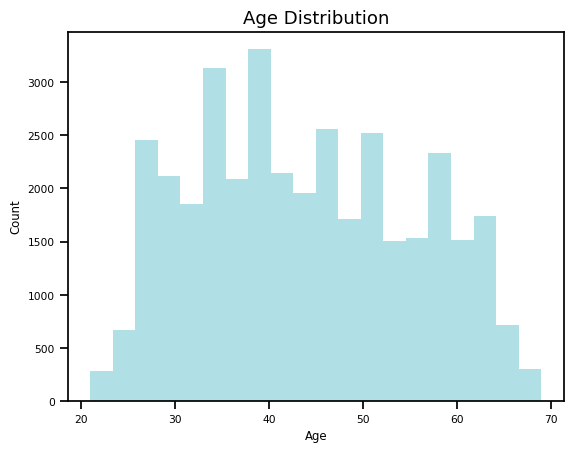

In [98]:
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

In [165]:
df['age'].describe()

count    36457.000000
mean        43.777382
std         11.519211
min         21.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         69.000000
Name: age, dtype: float64

Text(0, 0.5, 'Count')

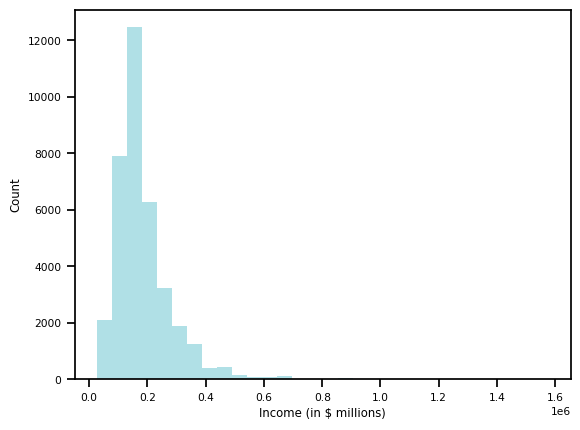

In [167]:
plt.hist(df['income'], bins=30)
plt.xlabel('Income (in $ millions)')
plt.ylabel('Count')

Text(0.5, 1.0, 'Years Employed Distribution')

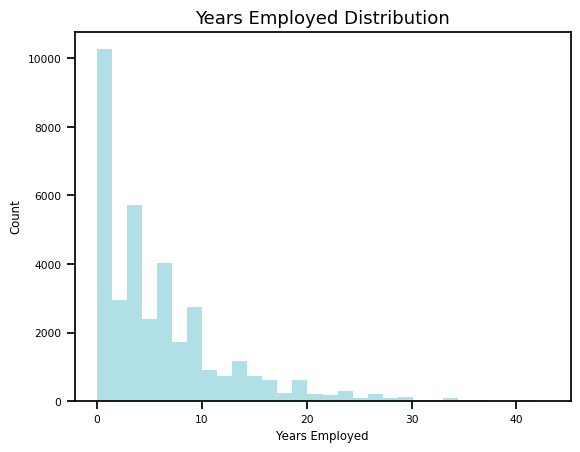

In [169]:
plt.hist(df['years_employed'], bins=30)
plt.xlabel('Years Employed')
plt.ylabel('Count')
plt.title('Years Employed Distribution')

## Excellent Payback Rates

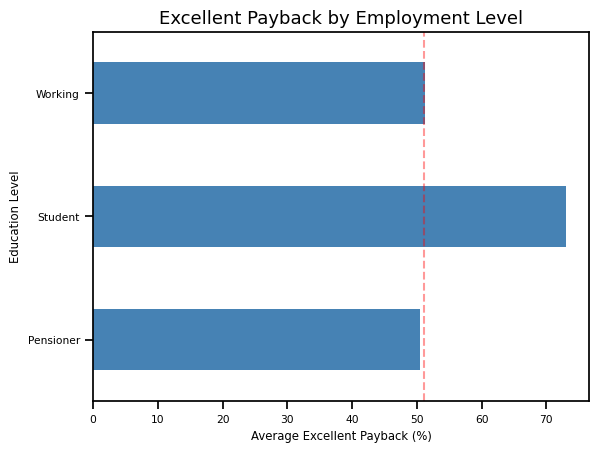

In [172]:
# plot bar chart
df.groupby('employment_type')['excellent_payback'].mean().plot(kind='barh', color='#4682B4')  

# add vertical reference line 
plt.axvline(df['excellent_payback'].mean(), color='red', linestyle='dashed', alpha = 0.4)

plt.xlabel('Average Excellent Payback (%)')
plt.ylabel('Education Level')
plt.title('Excellent Payback by Employment Level')

plt.show()

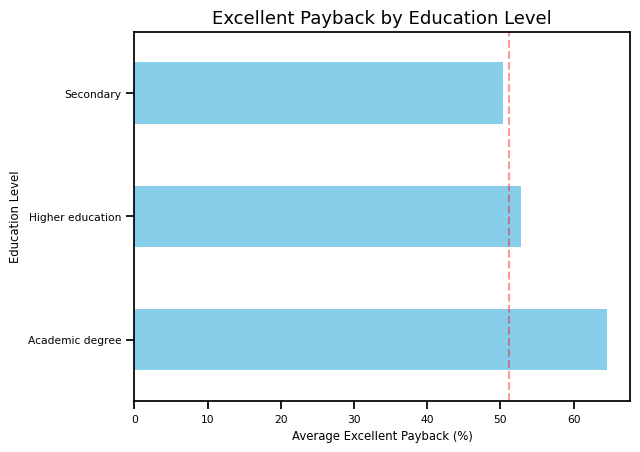

In [174]:
# plot bar chart
df.groupby('education')['excellent_payback'].mean().plot(kind='barh', color='#87CEEB') 

# add vertical reference line 
plt.axvline(df['excellent_payback'].mean(), color='red', linestyle='dashed', alpha = 0.4)

plt.xlabel('Average Excellent Payback (%)')
plt.ylabel('Education Level')
plt.title('Excellent Payback by Education Level')

plt.show()

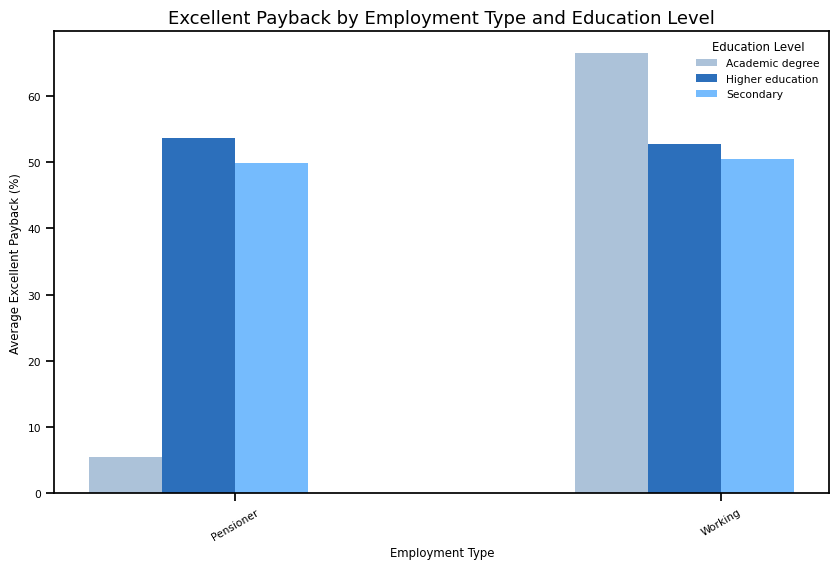

In [179]:
# unique colors for each education category
education_colors = {
    'Academic degree': '#acc2d9',  
    'Secondary': '#75bbfd',        
    'Higher education': '#2c6fbb'  
}

# filter for non students
working_df = df[df['employment_type'] != 'Student']

# group by employment type and education level, then calculate mean excellent payback rate
grouped_means = working_df.groupby(['employment_type', 'education'])['excellent_payback'].mean().unstack()

# get categories
employment_types = grouped_means.index
education_levels = grouped_means.columns

# set bar width
bar_width = 0.15
x = np.arange(len(employment_types))  # x-axis positions

plt.figure(figsize=(10, 6))

# plot bars for each education level with predefined colors
for i, edu in enumerate(education_levels):
    plt.bar(x + i * bar_width, grouped_means[edu], width=bar_width, color=education_colors.get(edu, 'gray'), label=edu)

plt.xlabel('Employment Type')
plt.ylabel('Average Excellent Payback (%)')
plt.title('Excellent Payback by Employment Type and Education Level')
plt.xticks(ticks=x + (len(education_levels) * bar_width) / 2, labels=employment_types, rotation=30)
plt.legend(title="Education Level")

plt.show()

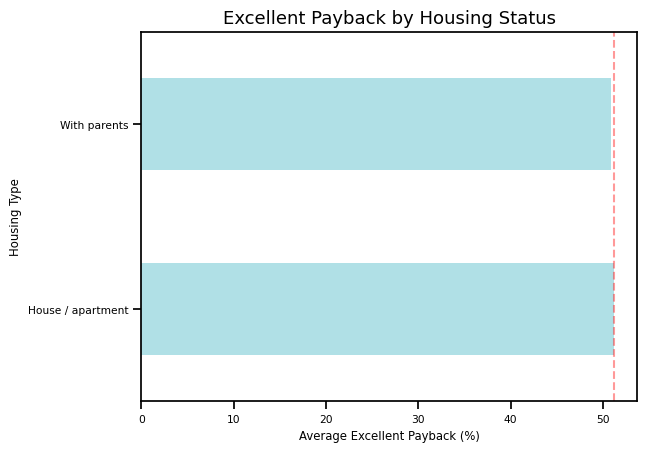

In [181]:
# plot bar chart
df.groupby('housing')['excellent_payback'].mean().plot(kind='barh', color='#B0E0E6')  

# add vertical reference line 
plt.axvline(df['excellent_payback'].mean(), color='red', linestyle='dashed', alpha = 0.4)

plt.xlabel('Average Excellent Payback (%)')
plt.ylabel('Housing Type')
plt.title('Excellent Payback by Housing Status')

plt.show()

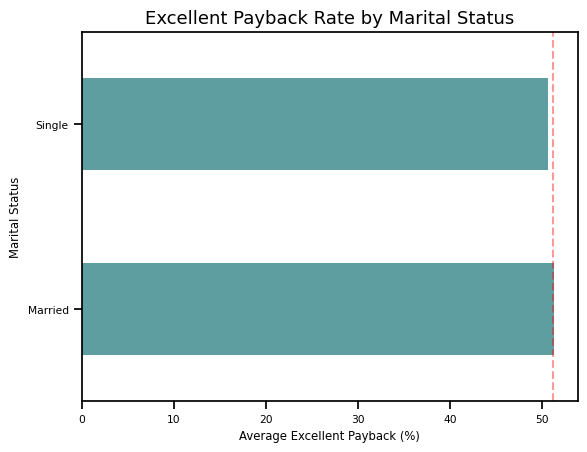

In [183]:
# plot bar chart
df.groupby('marital_status')['excellent_payback'].mean().plot(kind='barh', color='#5F9EA0')  # CadetBlue

# add vertical reference line 
plt.axvline(df['excellent_payback'].mean(), color='red', linestyle='dashed', alpha = 0.4)

plt.xlabel('Average Excellent Payback (%)')
plt.ylabel('Marital Status')
plt.title('Excellent Payback Rate by Marital Status')

plt.show()

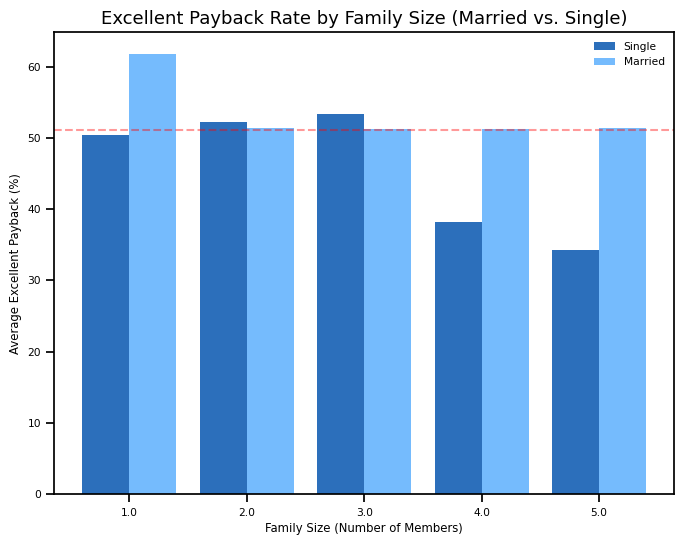

In [185]:
# create masks for married and single individuals
married_mask = df['marital_status'] == 'Married'
single_mask = df['marital_status'] == 'Single'

# filter for family sizes up to 5
married_fam_df = df[married_mask & (df['family_size'] <= 5)]
single_fam_df = df[single_mask & (df['family_size'] <= 5)]

# compute mean excellent payback rates by family size
married_means = married_fam_df.groupby('family_size')['excellent_payback'].mean()
single_means = single_fam_df.groupby('family_size')['excellent_payback'].mean()

# align indexes to ensure both datasets have the same family size categories
family_sizes = sorted(set(married_means.index).union(set(single_means.index)))
married_values = [married_means.get(size, 0) for size in family_sizes]
single_values = [single_means.get(size, 0) for size in family_sizes]

# set bar width
bar_width = 0.4
x = np.arange(len(family_sizes))  # X-axis positions

plt.figure(figsize=(8, 6))

# plot side-by-side bars
plt.bar(x - bar_width/2, single_values, width=bar_width, color='#2c6fbb', label='Single')  # LightSalmon
plt.bar(x + bar_width/2, married_values, width=bar_width, color='#75bbfd', label='Married')  # CadetBlue

# add vertical reference line
plt.axhline(df['excellent_payback'].mean(), color='red', linestyle='dashed', alpha = 0.4)

plt.xlabel('Family Size (Number of Members)')
plt.ylabel('Average Excellent Payback (%)')
plt.title('Excellent Payback Rate by Family Size (Married vs. Single)')
plt.xticks(ticks=x, labels=family_sizes)  # Set correct labels on x-axis
plt.legend()

plt.show()

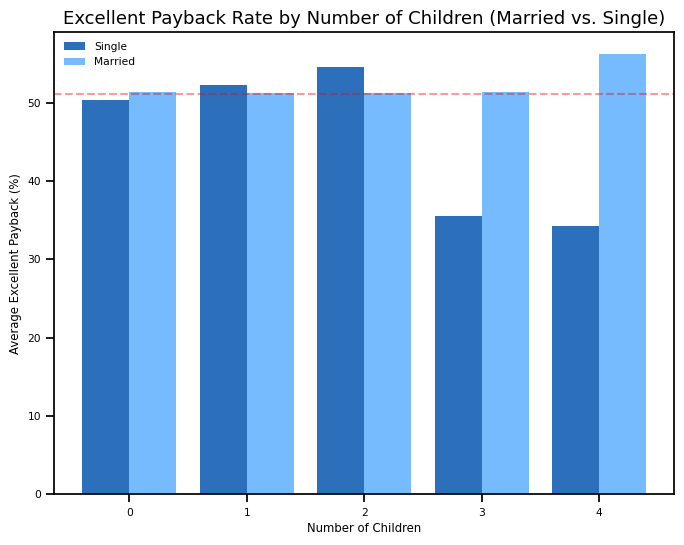

In [187]:
# filter for family sizes up to 5
married_child_df = df[married_mask & (df['children'] <= 4)]
single_child_df = df[single_mask & (df['children'] <= 4)]

# compute mean excellent payback rates by family size
married_means = married_child_df.groupby('children')['excellent_payback'].mean()
single_means = single_child_df.groupby('children')['excellent_payback'].mean()

# align indexes to ensure both datasets have the same family size categories
family_sizes = sorted(set(married_means.index).union(set(single_means.index)))
married_values = [married_means.get(size, 0) for size in family_sizes]
single_values = [single_means.get(size, 0) for size in family_sizes]

# set bar width
bar_width = 0.4
x = np.arange(len(family_sizes))  # X-axis positions

plt.figure(figsize=(8, 6))

# plot side-by-side bars
plt.bar(x - bar_width/2, single_values, width=bar_width, color='#2c6fbb', label='Single')  # LightSalmon
plt.bar(x + bar_width/2, married_values, width=bar_width, color='#75bbfd', label='Married')  # CadetBlue

# add vertical reference line
plt.axhline(df['excellent_payback'].mean(), color='red', linestyle='dashed', alpha = 0.4)

plt.xlabel('Number of Children')
plt.ylabel('Average Excellent Payback (%)')
plt.title('Excellent Payback Rate by Number of Children (Married vs. Single)')
plt.xticks(ticks=x, labels=family_sizes)  # Set correct labels on x-axis
plt.legend()

plt.show()

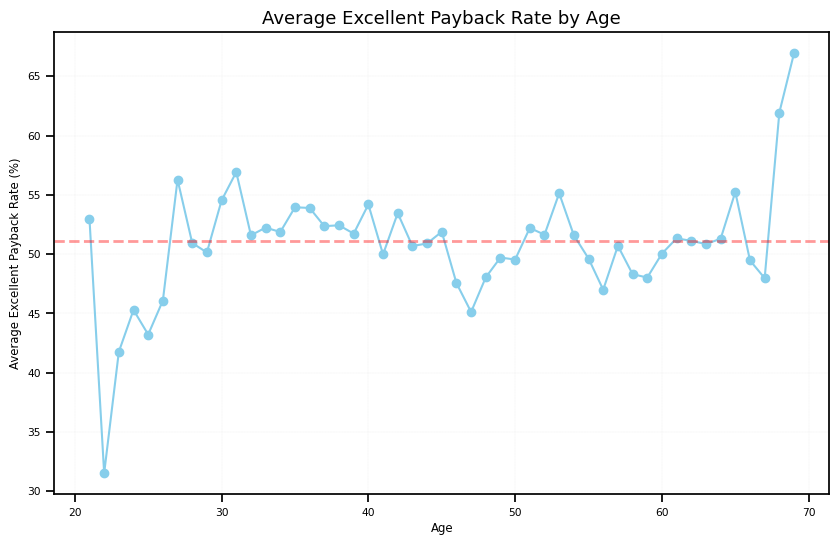

In [191]:
# compute the average excellent payback rate per years employed
avg_excellent_payback = df.groupby('age')['excellent_payback'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_excellent_payback.index, avg_excellent_payback.values, marker='o', linestyle='-', color='skyblue')

# add horizontal reference line
plt.axhline(df['excellent_payback'].mean(), color='red', linestyle='dashed', linewidth=2, label='Overall Avg Payback', alpha = 0.4)

plt.xlabel('Age')
plt.ylabel('Average Excellent Payback Rate (%)')
plt.title('Average Excellent Payback Rate by Age')

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

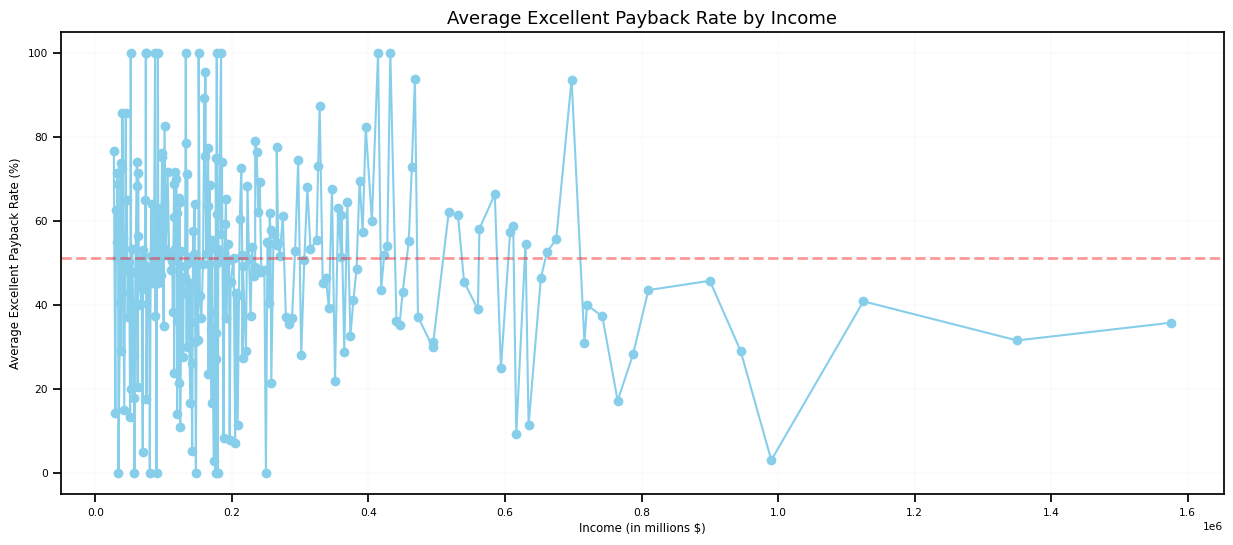

In [193]:
# compute the average excellent payback rate per years employed
avg_excellent_payback = df.groupby('income')['excellent_payback'].mean()

plt.figure(figsize=(15, 6))

# plot the line graph
plt.plot(avg_excellent_payback.index, avg_excellent_payback.values, marker='o', linestyle='-', color='skyblue')

# add horizontal reference line
plt.axhline(df['excellent_payback'].mean(), color='red', linestyle='dashed', linewidth=2, label='Overall Avg Payback', alpha = 0.4)

plt.xlabel('Income (in millions $)')
plt.ylabel('Average Excellent Payback Rate (%)')
plt.title('Average Excellent Payback Rate by Income')

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Machine Modeling

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [201]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

## Splitting data and initializing SMOTE

In [204]:
train_df, test_df = train_test_split(df, train_size = 0.8, test_size = 0.2)
test_df, validation_df = train_test_split(test_df, train_size=0.5, test_size=0.5)

In [208]:
X_train = train_df[['car_owned', 'realty_owned', 'children', 'income', 'family_size', 'age', 'years_employed',
                    'is_female', 'Higher education', 'Secondary', 'Academic degree',
                    'House / apartment', 'With parents', 'Working', 'Pensioner', 'Student',
                    'Married', 'Single']]
y_train = train_df['75_excellent']

X_validation = validation_df[['car_owned', 'realty_owned', 'children', 'income', 'family_size', 'age', 'years_employed',
                          'is_female', 'Higher education', 'Secondary', 'Academic degree',
                          'House / apartment', 'With parents', 'Working', 'Pensioner', 'Student',
                          'Married', 'Single']]
y_validation = validation_df['75_excellent']

In [227]:
# initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# scale features before SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

# apply SMOTE on the scaled training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# convert back to a DataFrame with the original column names
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# check class balance before and after SMOTE
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", np.bincount(y_train_resampled))

Before SMOTE:
 75_excellent
0    19314
1     9851
Name: count, dtype: int64
After SMOTE:
 [19314 19314]


## Random Forest Classifier

In [283]:
# initialize RF model
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# train model 
rf.fit(X_train_resampled, y_train_resampled)

# make predictions
y_rf_pred = rf.predict(X_validation_scaled)

# metrics
print("Accuracy:", accuracy_score(y_validation, y_rf_pred))
print("Precision:", precision_score(y_validation, y_rf_pred))
print(classification_report(y_validation, y_rf_pred))

Accuracy: 0.6947339550191991
Precision: 0.5552075176194206
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2392
           1       0.56      0.57      0.56      1254

    accuracy                           0.69      3646
   macro avg       0.66      0.66      0.66      3646
weighted avg       0.70      0.69      0.70      3646



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


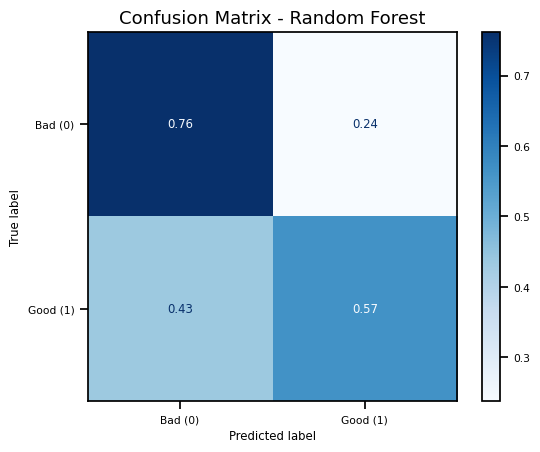

In [231]:
# Compute and display the confusion matrix
cm = confusion_matrix(y_validation, y_rf_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad (0)', 'Good (1)'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [233]:
accuracy = accuracy_score(y_validation, y_rf_pred)

#compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_validation, y_rf_pred).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

precision = precision_score(y_validation, y_rf_pred)
recall = recall_score(y_validation, y_rf_pred)
auroc = roc_auc_score(y_validation, y_rf_pred)

accuracy, tpr, tnr, fpr, fnr, precision, recall, auroc

(0.6947339550191991,
 0.5653907496012759,
 0.7625418060200669,
 0.23745819397993312,
 0.43460925039872406,
 0.5552075176194206,
 0.5653907496012759,
 0.6639662778106714)

In [235]:
validation_df['rf_pred'] = y_rf_pred

### Look into the true negatives

In [239]:
tn = validation_df[(validation_df['rf_pred'] == 0) & (validation_df['75_excellent'] == 0)]

In [241]:
tn.head()

,id,car_owned,realty_owned,children,income,employment_type,education,marital_status,housing,phone_owned,...,Academic degree,House / apartment,With parents,Working,Pensioner,Student,Married,Single,knn_pred,rf_pred
293332,5054756,0,1,2,202500.0,Working,Secondary,Married,House / apartment,1,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
13255,5009609,0,0,2,144000.0,Working,Secondary,Married,House / apartment,1,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0
449424,5090447,0,1,0,427500.0,Working,Higher education,Single,House / apartment,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
748037,5149013,0,1,0,225000.0,Working,Secondary,Married,House / apartment,1,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
473960,5092055,0,0,0,103500.0,Pensioner,Higher education,Single,House / apartment,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0


In [245]:
tn['car_owned'].value_counts() / df['car_owned'].value_counts()

car_owned
0    0.050455
1    0.049339
Name: count, dtype: float64

In [247]:
tn['realty_owned'].value_counts() / df['realty_owned'].value_counts()

realty_owned
1    0.050804
0    0.048448
Name: count, dtype: float64

In [249]:
tn['children'].value_counts() / df['children'].value_counts()

children
0     0.049244
1     0.053924
2     0.049754
3     0.035800
4     0.031746
5          NaN
7          NaN
14         NaN
19         NaN
Name: count, dtype: float64

In [251]:
tn['children'].value_counts() / len(tn)

children
0    0.680373
1    0.221491
2    0.088816
3    0.008224
4    0.001096
Name: count, dtype: float64

In [255]:
tn['family_size'].value_counts() / df['family_size'].value_counts()

family_size
1.0     0.054816
2.0     0.047423
3.0     0.053730
4.0     0.050225
5.0     0.037783
6.0     0.034483
7.0          NaN
9.0          NaN
15.0         NaN
20.0         NaN
Name: count, dtype: float64

In [257]:
tn['family_size'].value_counts() / len(tn)

family_size
2.0    0.506031
1.0    0.209978
3.0    0.189145
4.0    0.085526
5.0    0.008224
6.0    0.001096
Name: count, dtype: float64

In [259]:
tn['education'].value_counts() / len(tn)

education
Secondary           0.718750
Higher education    0.280702
Academic degree     0.000548
Name: count, dtype: float64

In [263]:
tn['education'].value_counts() / df['education'].value_counts()

education
Secondary           0.052125
Higher education    0.045414
Academic degree     0.031250
Name: count, dtype: float64

In [265]:
tn['employment_type'].value_counts() / len(tn)

employment_type
Working      0.824561
Pensioner    0.174890
Student      0.000548
Name: count, dtype: float64

In [267]:
tn['employment_type'].value_counts() / df['employment_type'].value_counts() 

employment_type
Working      0.049647
Pensioner    0.051853
Student      0.090909
Name: count, dtype: float64

In [269]:
tn['marital_status'].value_counts() / len(tn)

marital_status
Married    0.750548
Single     0.249452
Name: count, dtype: float64

In [271]:
tn['marital_status'].value_counts() / df['marital_status'].value_counts() 

marital_status
Married    0.048905
Single     0.053757
Name: count, dtype: float64

In [273]:
single_mask = tn['marital_status'] == 'Single'

tn[single_mask]['children'].value_counts() / tn['children'].value_counts()

children
0    0.309428
1    0.160891
2    0.037037
3         NaN
4         NaN
Name: count, dtype: float64

## KNearestNeighbors

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN Accuracy: 0.62
KNN Precision: 0.45
KNN AUROC: 0.61
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      2392
           1       0.45      0.57      0.51      1254

    accuracy                           0.62      3646
   macro avg       0.60      0.61      0.60      3646
weighted avg       0.64      0.62      0.62      3646



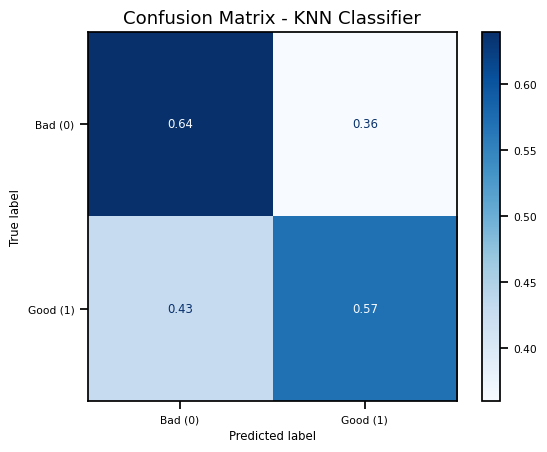

In [275]:
# initialize KNN 
knn = KNeighborsClassifier(n_neighbors=13)

# train model
knn.fit(X_train_resampled, y_train_resampled)

# make predictions
y_knn_pred = knn.predict(X_validation_scaled)

# print metrics
accuracy = accuracy_score(y_validation, y_knn_pred)
precision = precision_score(y_validation, y_knn_pred)
recall = recall_score(y_validation, y_knn_pred)
auroc = roc_auc_score(y_validation, y_knn_pred)
print(f"KNN Accuracy: {accuracy:.2f}")
print(f"KNN Precision: {precision:.2f}")
print(f"KNN AUROC: {auroc:.2f}")
print(classification_report(y_validation, y_knn_pred))

# compute and display the confusion matrix
cm = confusion_matrix(y_validation, y_knn_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad (0)', 'Good (1)'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title("Confusion Matrix - KNN Classifier")
plt.show()

In [221]:
accuracy = accuracy_score(y_validation, y_knn_pred)

#compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_validation, y_knn_pred).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

precision = precision_score(y_validation, y_knn_pred)
recall = recall_score(y_validation, y_knn_pred)
auroc = roc_auc_score(y_validation, y_knn_pred)

accuracy, tpr, tnr, fpr, fnr, precision, recall, auroc

(0.6160175534832694,
 0.5701754385964912,
 0.6400501672240803,
 0.35994983277591974,
 0.4298245614035088,
 0.4536802030456853,
 0.5701754385964912,
 0.6051128029102857)

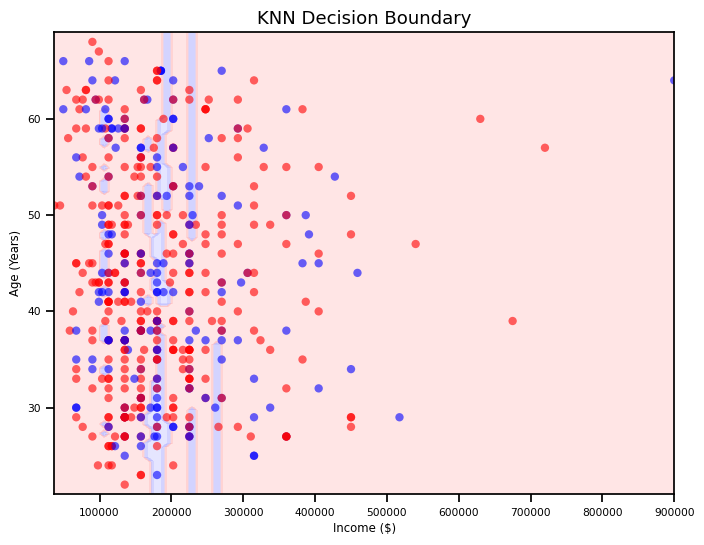

In [279]:
from matplotlib.colors import ListedColormap

# inverse transform to get unscaled data
X_train_unscaled = scaler.inverse_transform(X_train_scaled)
X_train_unscaled = pd.DataFrame(X_train_unscaled, columns=X_train.columns)  # Convert back to DataFrame

# select two unscaled features for visualization
X_selected = X_train_unscaled[['income', 'age']].values  # convert to NumPy array
y_selected = y_train_resampled  # labels

# limit number of points displayed
sample_size = 500
if len(X_selected) > sample_size:
    indices = np.random.choice(len(X_selected), sample_size, replace=False)
    X_selected = X_selected[indices]
    y_selected = y_selected.iloc[indices]

# train KNN on the selected features
knn_vis = KNeighborsClassifier(n_neighbors=12)
knn_vis.fit(X_selected, y_selected)

# meshgrid for unscaled values
x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# make predictions
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot decision boundary with unscaled data
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(["#FFAAAA", "#AAAAFF"])
cmap_points = ListedColormap(["#FF0000", "#0000FF"])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)  # decision regions
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y_selected, cmap=cmap_points, edgecolor="k", alpha=0.6)  # data points

plt.xlabel("Income ($)")
plt.ylabel("Age (Years)")
plt.title(f"KNN Decision Boundary")
plt.show()